In [26]:
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn
import numpy as np

# **GPU Information**

In [2]:
!nvidia-smi

Wed Dec  4 15:45:15 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P8             10W /   75W |     543MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Data Processing**

---



In [3]:
# Load the data from the Excel file and show it using openpyxl
wb = load_workbook("output-fourth-moderation.xlsx")
ws = wb.active

In [ ]:
#moderate feedbacks
for row in ws.iter_rows(min_row=2, max_row=16, min_col=10, max_col=17):
   # get current row's index
   row_index = row[0].row
   # timestap
   timestamp_cell_name = "A" + str(row_index)
   # add this cell to the row
   new_row = [ws[timestamp_cell_name].value]
   # add the rest of the cells to the row
   for cell in row:
      new_row.append(cell.value)

   ws.append(new_row)

In [ ]:
# worst feedbacks
for row in ws.iter_rows(min_row=2, max_row=16, min_col=18, max_col=25):
   # get current row's index
   row_index = row[0].row
   # timestap
   timestamp_cell_name = "A" + str(row_index)
   # add this cell to the row
   new_row = [ws[timestamp_cell_name].value]
   # add the rest of the cells to the row
   for cell in row:
      new_row.append(cell.value)

   ws.append(new_row)

In [ ]:
# save the file
wb.save('output_file-2.xlsx')
print("File saved")

In [ ]:
input_file='Responses-to-Excel-in-8-columns-and-range-define.xlsx'
df=pd.read_excel(input_file,sheet_name='Sheet 1')
df

In [ ]:
# csv_data = pandas.from_csv
# input_file='Customer Feedback (Responses).xlsx'
# df=pd.read_excel(input_file,sheet_name='Form Responses 2')
# print(df)
# output_file='output_file.xlsx'
# df.to_excel(output_file,index=False,sheet_name='Sheet 1')

In [ ]:
def classify_value(value):
  if value<4:
    return 'Low'
  elif 4<=value<=6:
    return 'Medium'
  else:
    return 'High'
df['FQR'] = df['FQ'].apply(classify_value)
df['FCR'] = df['FC'].apply(classify_value)
df['CLR'] = df['CL'].apply(classify_value)
df['TMR'] = df['TM'].apply(classify_value)
df['PVR'] = df['PV'].apply(classify_value)
df['STR'] = df['ST'].apply(classify_value)
df['RECR'] = df['REC'].apply(classify_value)
df["FER"] = df["FE"].apply(classify_value)

In [ ]:
output_file='output-second-moderation.xlsx'
df.to_excel(output_file,index=False,sheet_name='Sheet 1')

# **Plotting and Visualizaion**

---



In [4]:
columns_to_plot = ['FQ', 'FC', 'CL', 'FE','TM', 'PV', 'ST']
target_column = 'REC'

In [5]:
input_file='output-fourth-moderation.xlsx'
df=pd.read_excel(input_file,sheet_name='Sheet 1')
df

,Timestamp,FQR,FQ,FCR,FC,CLR,CL,TMR,TM,FER,FE,PVR,PV,STR,ST,RECR,REC,Can you describe your experience at the restaurant in your own language?
0,2024-06-07 22:03:54,High,8,Medium,4,Medium,4,Medium,6,High,8,High,8,High,7,Medium,4,It was a different experience than most other....
1,2024-06-23 23:33:54,High,9,High,9,High,9,High,8,Medium,5,High,9,High,9,High,9,Very good
2,2024-06-23 23:35:56,Low,3,Medium,5,High,7,Medium,6,Medium,6,Medium,5,Low,3,Low,3,Basically they served food with very less in a...
3,2024-06-23 23:36:23,High,10,High,10,High,10,High,8,High,7,High,10,High,9,High,9,"Excellent environment, proper air conditioning..."
4,2024-06-23 23:49:45,High,8,High,9,High,9,High,9,High,10,High,8,High,8,High,7,Super
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104626,12/30/24 01:42,High,8,Medium,6,High,7,High,7,High,8,High,7,High,7,High,7,NaN
104627,12/31/24 01:03,High,9,Medium,6,Low,3,Medium,5,Medium,6,High,7,Medium,6,Medium,6,NaN
104628,12/31/24 03:32,High,9,Low,1,Low,3,Low,3,Low,2,Medium,4,Medium,4,Medium,4,NaN
104629,12/31/24 05:02,Low,1,High,8,Medium,6,Low,2,Medium,6,Medium,5,Low,3,Medium,4,NaN


A scatter plot is a type of data visualization that represents the relationship between two numerical variables. It is commonly used to identify patterns, trends, and correlations between the variables.

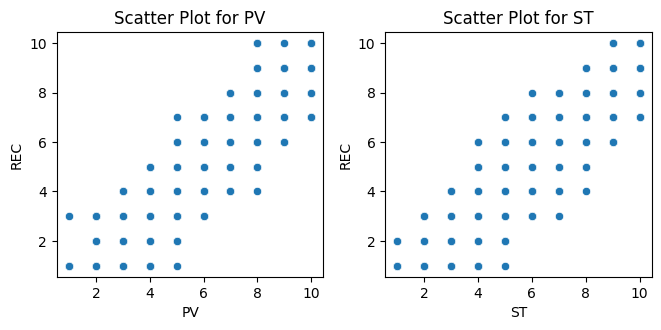

In [11]:
plt.figure(figsize=(10, 6))
params = [x for x in columns_to_plot if x == 'ST' or x == 'PV']

for i, param in enumerate(params):
    plt.subplot(2, 3, i+1)
    seaborn.scatterplot(x=param, y='REC', data=df)
    plt.title(f'Scatter Plot for {param}')
    plt.xlabel(param)
    plt.ylabel('REC')

plt.tight_layout()
plt.show()

A line plot displays information as a series of data points connected by straight line segments. It's often used to visualize data over time, showing trends or changes.

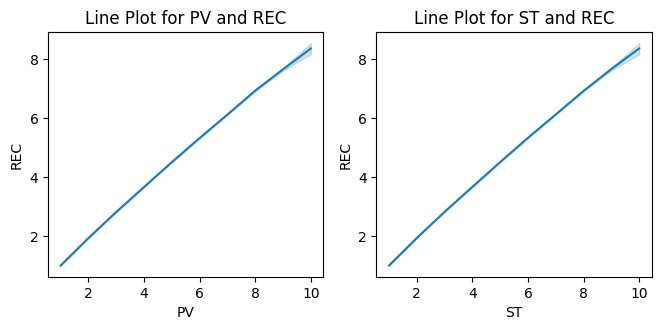

In [12]:
plt.figure(figsize=(10,6))
params = [x for x in columns_to_plot if x == 'ST' or x == 'PV']

for i,param in enumerate(params):
  plt.subplot(2,3,i+1)
  seaborn.lineplot(x=param,y='REC',data=df)
  plt.title(f'Line Plot for {param} and REC')
  plt.xlabel(param)
  plt.ylabel('REC')

plt.tight_layout()
plt.show()

A histogram is a graphical representation of the distribution of numerical data. It groups data into bins or intervals and shows the frequency of data points within each bin. It's useful for understanding the shape, spread, and central tendency of data.

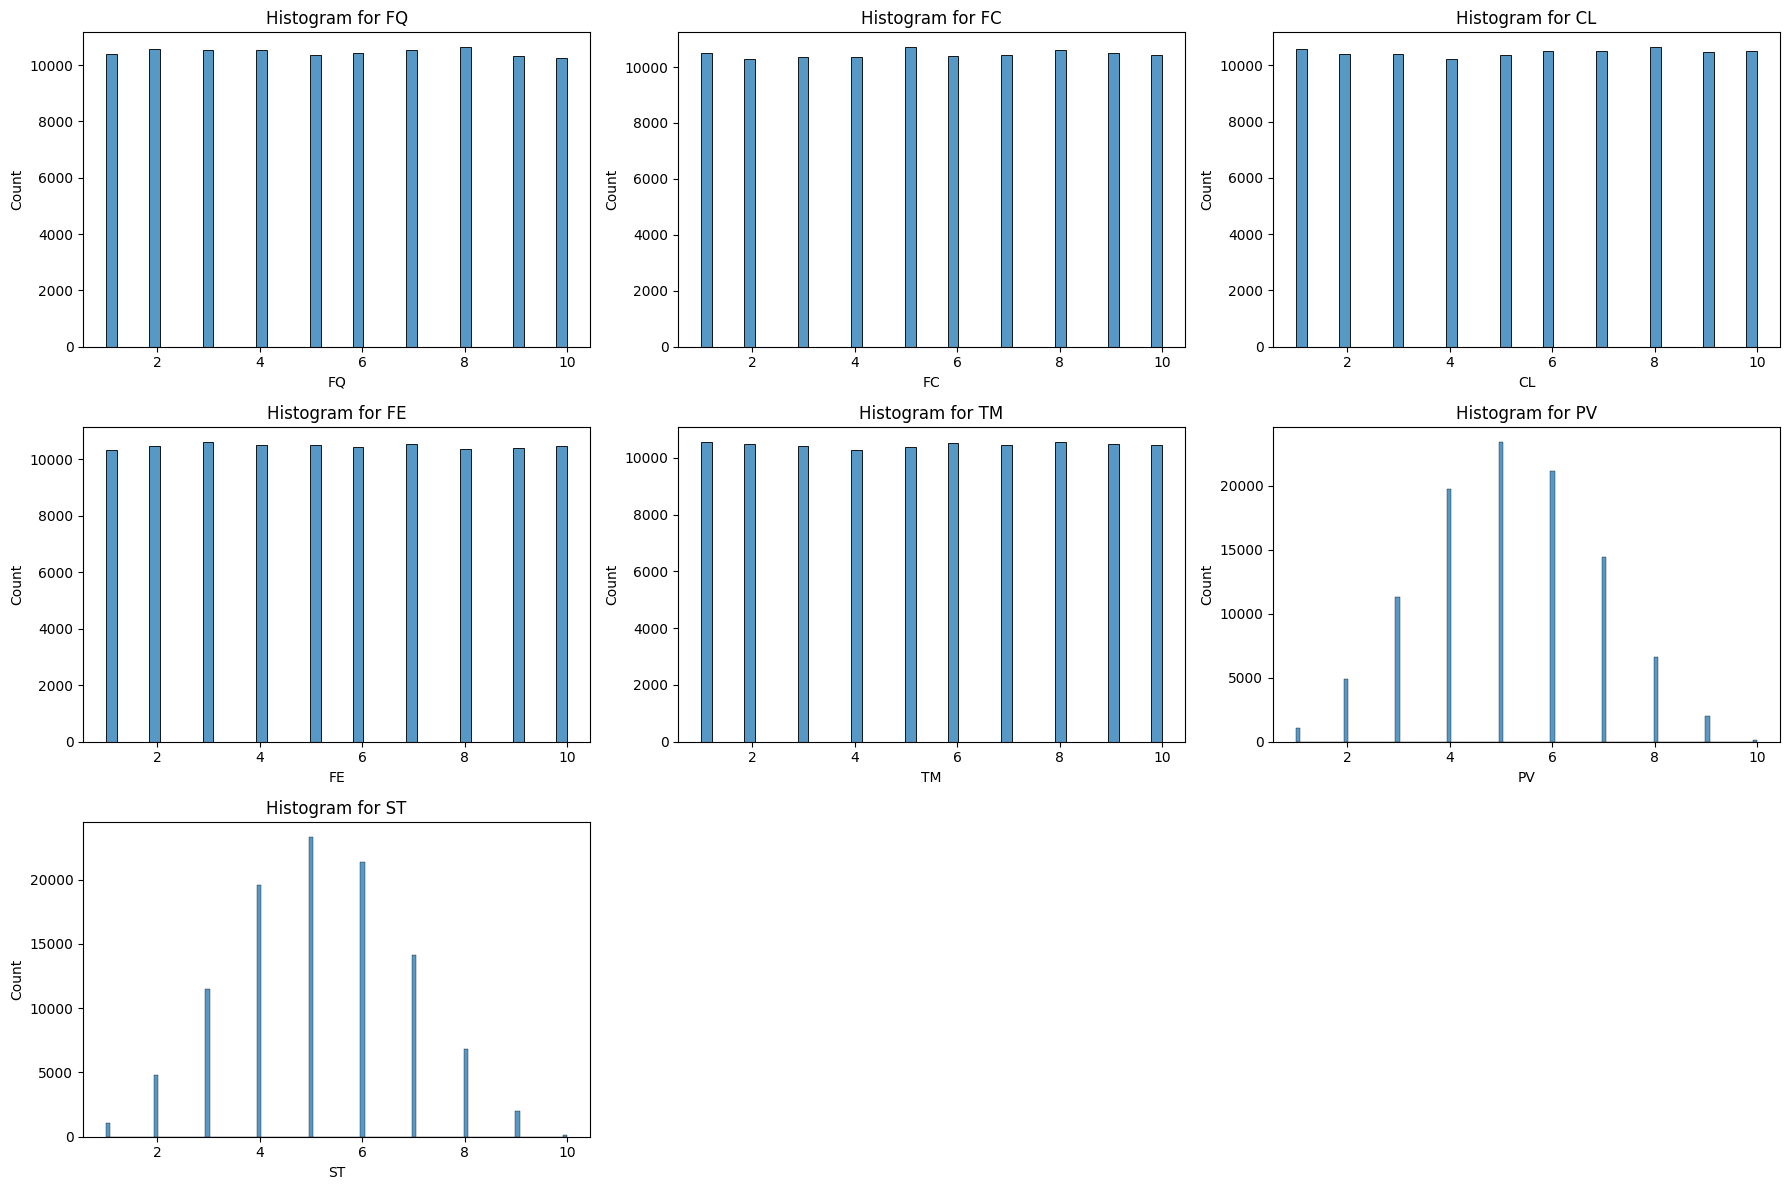

In [13]:
plt.figure(figsize=(18, 12))

for i, param in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    seaborn.histplot(x=param, data=df)
    plt.title(f'Histogram for {param}')
    plt.xlabel(param)

plt.tight_layout()
plt.show()

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

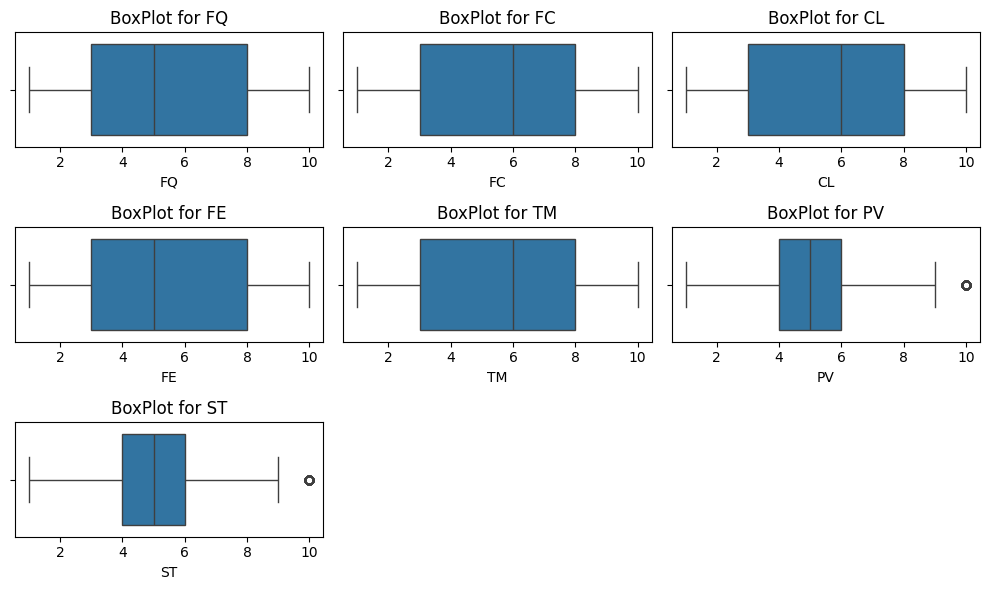

In [15]:
plt.figure(figsize=(10, 6))

for i, param in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    seaborn.boxplot(x=param, data=df)
    plt.title(f'BoxPlot for {param}')
    plt.xlabel(param)

plt.tight_layout()
plt.show()

A violin plot is similar to a box plot but with a rotated kernel density plot on each side. It provides a deeper understanding of the distribution of the data, showing peaks in the data distribution that might be averaged out in a box plot.

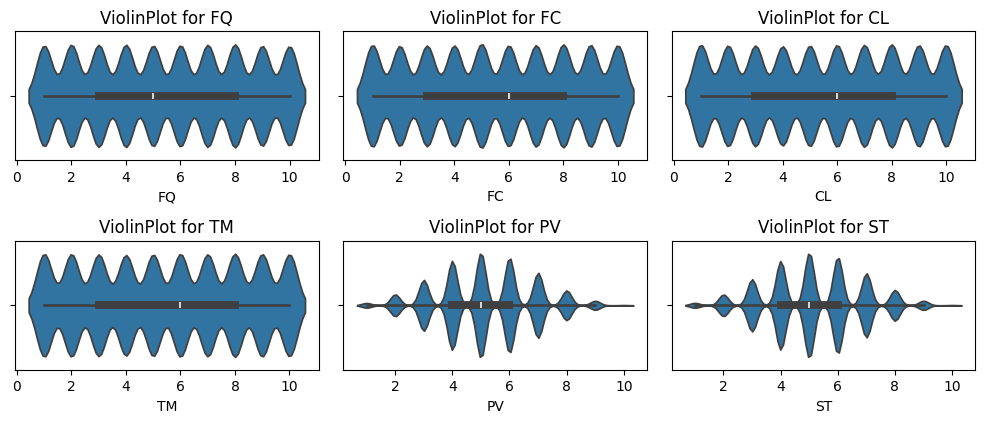

In [16]:
##ViolenPlot
params=['FQ','FC','CL','TM','PV','ST']
plt.figure(figsize=(10,6))

for i,param in enumerate(params):
  plt.subplot(3,3,i+1)
  seaborn.violinplot(x=param,data=df)
  plt.title(f'ViolinPlot for {param}')
  plt.xlabel(param)
plt.tight_layout()
plt.show()

A bar plot represents data with rectangular bars with lengths proportional to the values they represent. It's used for comparing different categories of data or showing changes over time for a single category with discrete time intervals.

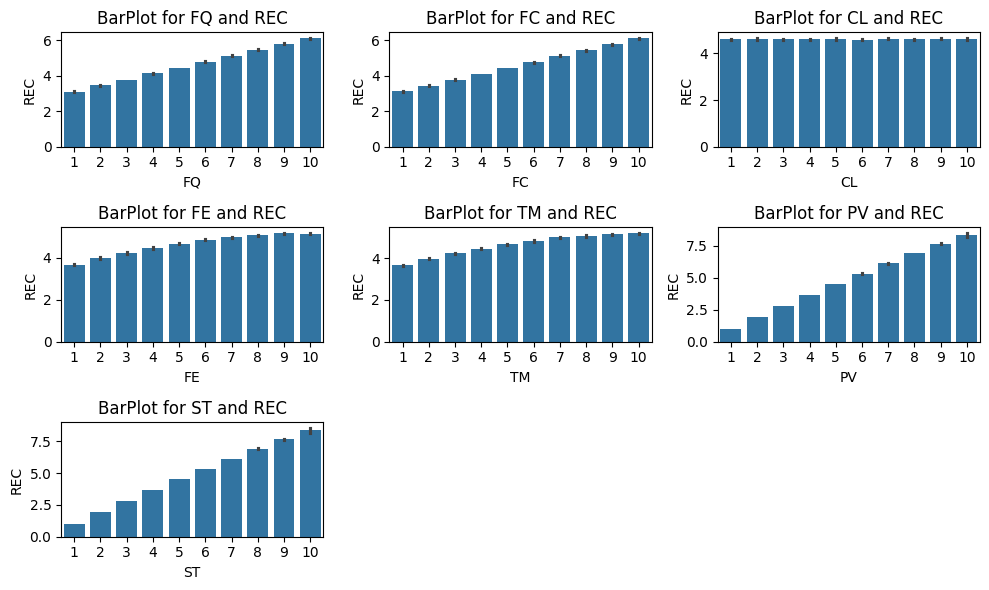

In [18]:
##BarPlot
plt.figure(figsize=(10,6))

for i,param in enumerate(columns_to_plot):
  plt.subplot(3,3,i+1)
  seaborn.barplot(x=param,y='REC',data=df)
  plt.title(f'BarPlot for {param} and REC')
  plt.xlabel(param)
  plt.ylabel('REC')
plt.tight_layout()
plt.show()


A count plot is a type of bar plot where the y-axis represents the count of instances in each category shown on the x-axis. It's useful for visualizing the distribution of categorical data.

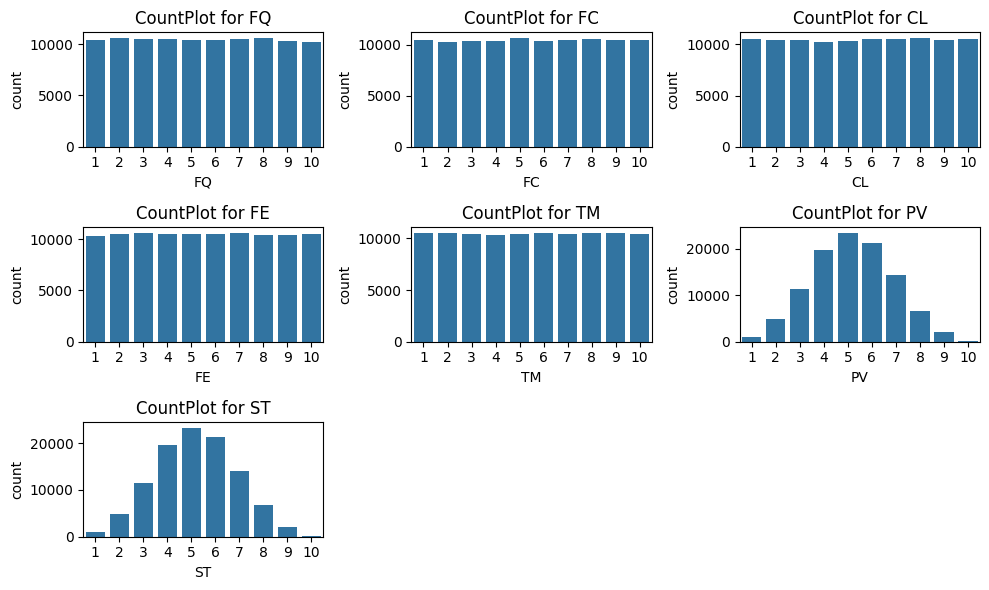

In [19]:
##CountPlot
plt.figure(figsize=(10,6))

for i,param in enumerate(columns_to_plot):
  plt.subplot(3,3,i+1)
  seaborn.countplot(x=param,data=df)
  plt.title(f'CountPlot for {param}')
  plt.xlabel(param)
plt.tight_layout()
plt.show()


A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion. Each slice represents a category's contribution to the whole. It's best used for showing a part-to-whole relationship when there are few categories, and the relative sizes are easy to interpret.

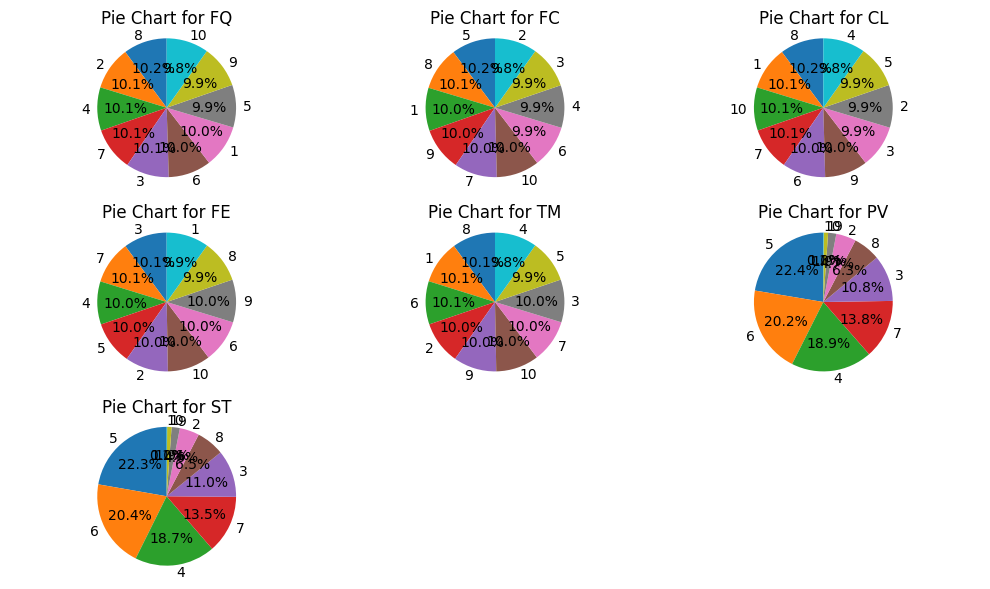

In [20]:
##piechart
plt.figure(figsize=(10,6))

for i,param in enumerate(columns_to_plot):
  plt.subplot(3,3,i+1)
  rec_count=df[param].value_counts()
  plt.pie(rec_count.values, labels=rec_count.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie Chart for {param}')
  plt.axis('equal')
plt.tight_layout()
plt.show()

# **Regression Models**
---

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
columns_to_plot = ['FQ', 'FC', 'CL', 'FE','TM', 'PV', 'ST']
target_column = 'REC'
input_file='output-fourth-moderation.xlsx'
df=pd.read_excel(input_file,sheet_name='Sheet 1')
# df

## **Linear Regression**

The coefficient in a linear regression model represents the relationship between a feature (or independent variable) and the target variable (or dependent variable). It indicates the change in the target variable for a one-unit change in the corresponding feature, while holding all other features constant.


In [4]:
# linear regression
from sklearn.linear_model import LinearRegression

def linear_regression(_X, _y):
    X_train, X_test, y_train, y_test = train_test_split(
        _X, _y, test_size=0.2, random_state=0)

    # regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # making coefficient dataframe
    coeff_df = pd.DataFrame(regressor.coef_, _X.columns,
                            columns=['Coefficient'])
    print("Dataframe for Coefficients")
    print(coeff_df)

    # predicting the test set results
    y_pred = regressor.predict(X_test)

    # comparing actual vs predicted
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    # Evaluating the Algorithm
    print("\nError Metrics:")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) * 100, "%")
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred) * 100, "%")
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)) * 100, "%")

    # scatter plot
    print("\nScatter Plot")
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

    plt.show()

    return y_pred

### **All Variables**

Dataframe for Coefficients
    Coefficient
FQ     0.002009
FC     0.002764
CL     0.000098
FE    -0.000223
TM     0.001048
PV     0.497928
ST     0.496895

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.452477
34078       4   4.445317
26013       3   2.944964
87910       4   3.446518
88159       4   3.451037
...       ...        ...
47260       4   4.955034
9914        2   1.451926
93691       6   5.451448
77229       3   2.953174
7455        4   3.450134

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 34.38807613608687 %
Mean Squared Error: 19.48268910899257 %
Root Mean Squared Error: 44.13919925530205 %

Scatter Plot


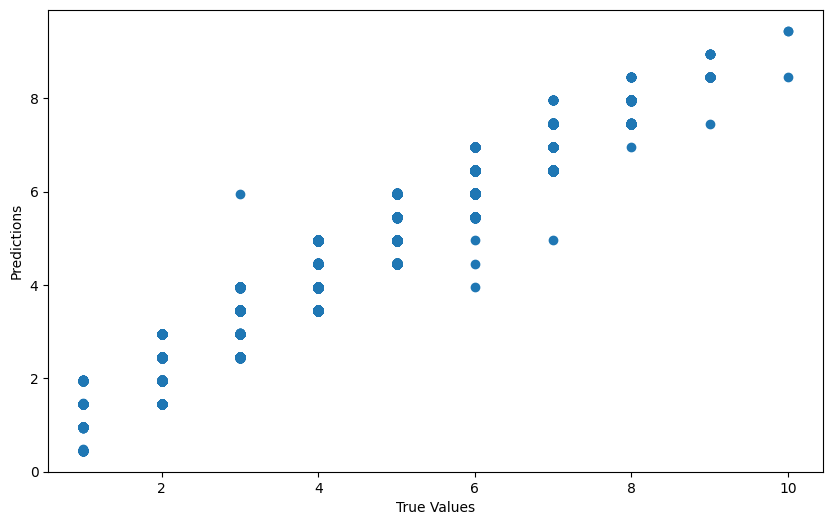

array([5.45247738, 4.44531728, 2.9449638 , ..., 5.45144787, 2.95317437,
       3.45013366])

In [5]:
##taking all the columns
X = df[columns_to_plot]
y = df['REC']

linear_regression(X, y)

### JUST **ST** and **PV**

Dataframe for Coefficients
    Coefficient
ST     0.501714
PV     0.499221

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.449946
34078       4   4.449011
26013       3   2.948853
87910       4   3.450568
88159       4   3.450568
...       ...        ...
47260       4   4.955711
9914        2   1.448696
93691       6   5.452439
77229       3   2.951346
7455        4   3.450568

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 34.386824448044436 %
Mean Squared Error: 19.480963128044372 %
Root Mean Squared Error: 44.13724405538294 %

Scatter Plot


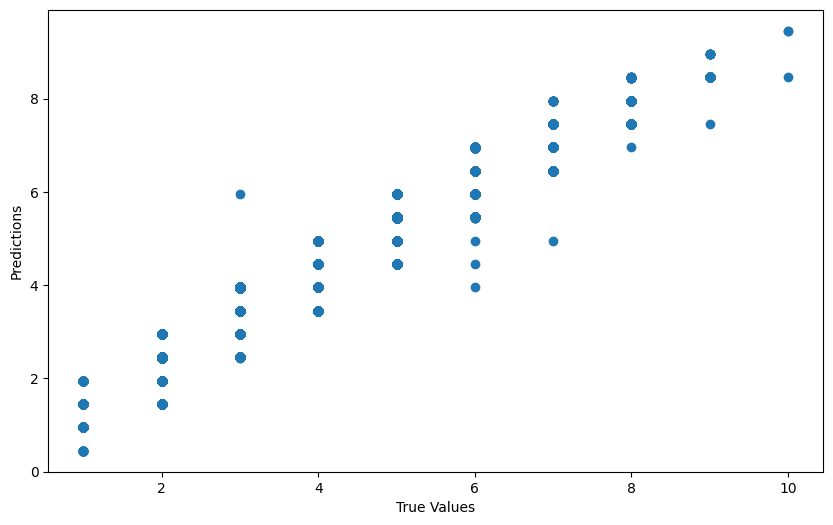

In [28]:
##taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

linear_regression(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 

Dataframe for Coefficients
    Coefficient
FC     0.333170
FQ     0.333800
CL     0.000673
FE     0.332711

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       7   6.997580
34078       6   5.999037
26013       4   3.665334
87910       4   3.668858
88159       4   4.335615
...       ...        ...
47260       4   4.338539
9914        2   1.999505
93691       6   6.331868
77229       3   3.007963
7455        4   4.000682

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 22.48830322492649 %
Mean Squared Error: 7.9240197562852135 %
Root Mean Squared Error: 28.149635443971942 %

Scatter Plot


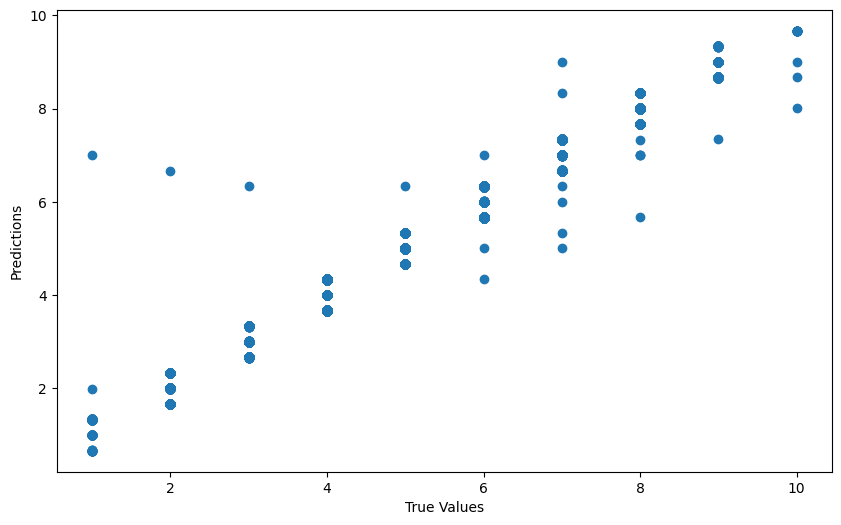

In [31]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = linear_regression(X, y)

Dataframe for Coefficients
    Coefficient
FC     0.333497
FQ     0.333439
TM     0.333223
FE    -0.000147

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   4.667051
34078       4   4.331986
26013       3   2.998367
87910       4   3.665538
88159       4   3.666451
...       ...        ...
47260       7   7.000012
9914        2   2.333020
93691       6   5.999333
77229       4   4.333250
7455        4   4.332258

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 22.46192226576835 %
Mean Squared Error: 7.822628614447769 %
Root Mean Squared Error: 27.96896246636219 %

Scatter Plot


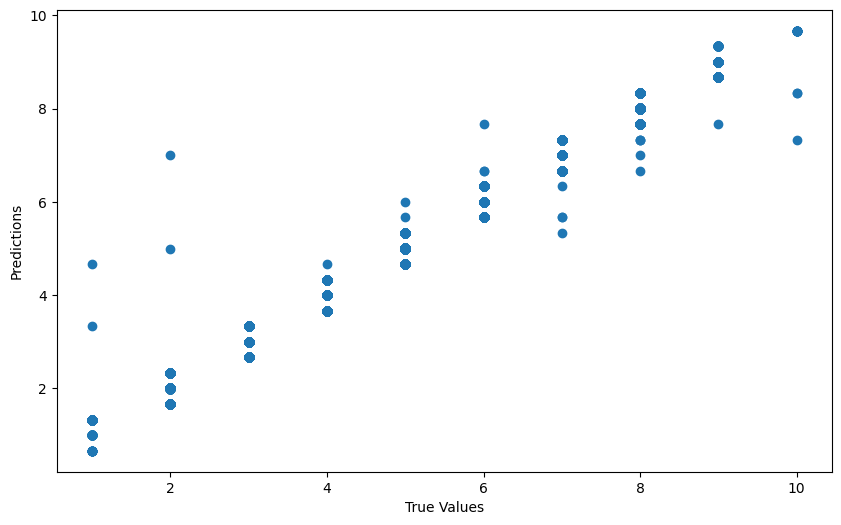

In [36]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = linear_regression(X, y)

Dataframe for Coefficients
    Coefficient
PV     0.007758
ST    -0.013933

Dataframe for Actual vs Predicted
       Actual  Predicted
8399        9   4.633933
19690       5   4.643195
12574       6   4.608684
11330       3   4.637068
10061       5   4.641141
...       ...        ...
17913       4   4.642698
18649       4   4.605019
18310       5   4.620567
19895       6   4.636473
19383       6   4.651490

[4186 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 127.48772432741661 %
Mean Squared Error: 242.0940005369794 %
Root Mean Squared Error: 155.5937018445732 %

Scatter Plot


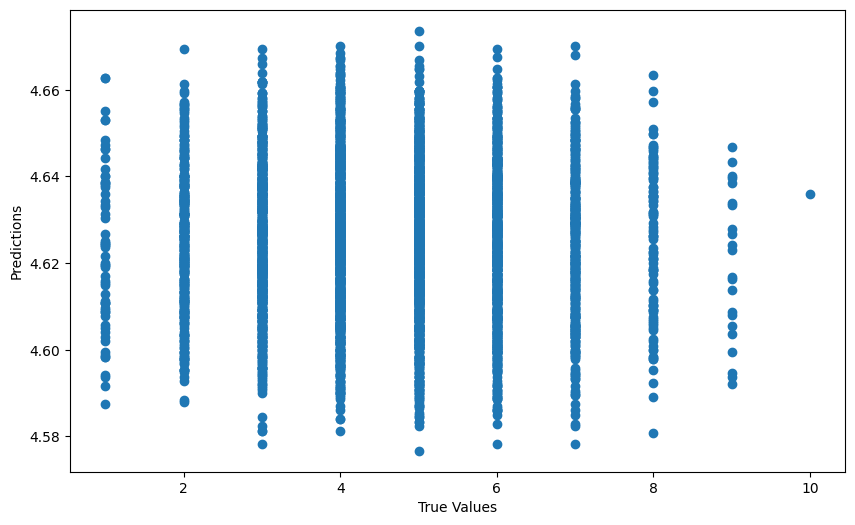

array([4.63393346, 4.64319465, 4.60868443, ..., 4.6205672 , 4.63647345,
       4.65148986])

In [43]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

linear_regression(X, y)

## **Support Vector Regression**

Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value. There are several concepts related to support vector regression (SVR) that you may want to understand in order to use it effectively. Here are a few of the most important ones:

- Support vector machines (SVMs): SVR is a type of support vector machine (SVM), a supervised learning algorithm that can be used for classification or regression tasks. SVMs try to find the hyperplane in a high-dimensional space that maximally separates different classes or output values.

- Kernels: SVR can use different types of kernels, which are functions that determine the similarity between input vectors. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity.

- Hyperparameters: SVR has several hyperparameters that you can adjust to control the behavior of the model. For example, the ‘C’ parameter controls the trade-off between the insensitive loss and the sensitive loss. A larger value of ‘C’ means that the model will try to minimize the insensitive loss more, while a smaller value of C means that the model will be more lenient in allowing larger errors.

- Model evaluation: Like any machine learning model, it’s important to evaluate the performance of an SVR model. One common way to do this is to split the data into a training set and a test set, and use the training set to fit the model and the test set to evaluate it. You can then use metrics like mean squared error (MSE) or mean absolute error (MAE) to measure the error between the predicted and true output values.

In [14]:
# support vector regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


def support_vector_regression(_X, _y):
    X_train, X_test, y_train, y_test = train_test_split(
        _X, _y, test_size=0.2, random_state=0)

    # Standardizing the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # regression model
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train_scaled, y_train)

    # predicting the test set results
    y_pred = regressor.predict(X_test_scaled)

    # comparing actual vs predicted
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    # Evaluating the Algorithm
    print("\nError Metrics:")
    print('Mean Absolute Error:', metrics.mean_absolute_error(
        y_test, y_pred) * 100, "%")
    print('Mean Squared Error:', metrics.mean_squared_error(
        y_test, y_pred) * 100, "%")
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)) * 100, "%")

    # scatter plot
    print("\nScatter Plot")
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='red', label='Predicted (RBF)')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.title('Support Vector Regression')
    plt.show()

    return y_pred

### **All Variables**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.036764
34078       4   3.962620
26013       3   3.090741
87910       4   3.905342
88159       4   3.903525
...       ...        ...
47260       4   4.034634
9914        2   1.892868
93691       6   5.909253
77229       3   3.092197
7455        4   3.908195

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 8.063604240538663 %
Mean Squared Error: 1.0719330481517402 %
Root Mean Squared Error: 10.353419957442759 %

Scatter Plot


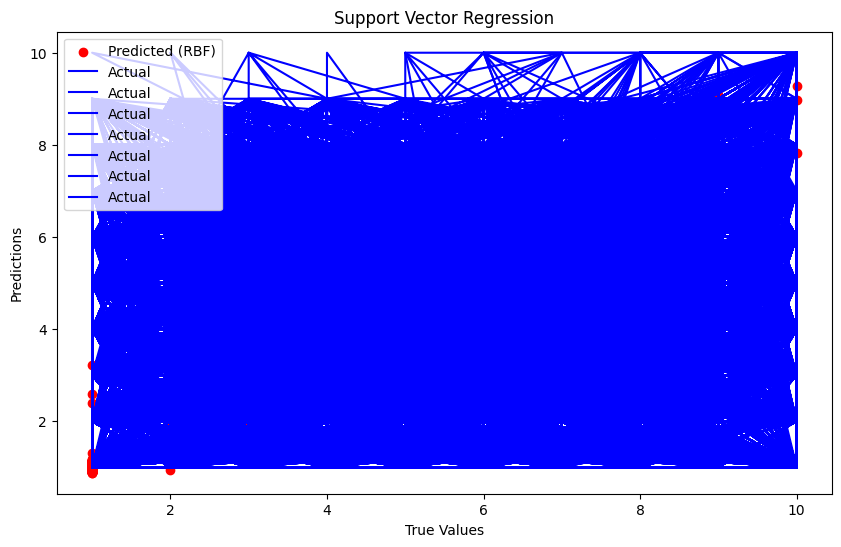

array([5.03676392, 3.96261977, 3.09074118, ..., 5.9092532 , 3.0921967 ,
       3.90819532])

In [6]:
##taking all the columns
X = df[columns_to_plot]
y = df['REC']

support_vector_regression(X, y)

### JUST **ST** and **PV**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.014221
34078       4   3.977509
26013       3   3.099476
87910       4   3.900191
88159       4   3.900191
...       ...        ...
47260       4   4.100218
9914        2   1.899710
93691       6   5.899503
77229       3   3.099499
7455        4   3.900191

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 8.320381026633754 %
Mean Squared Error: 1.093202905391963 %
Root Mean Squared Error: 10.455634392001105 %

Scatter Plot


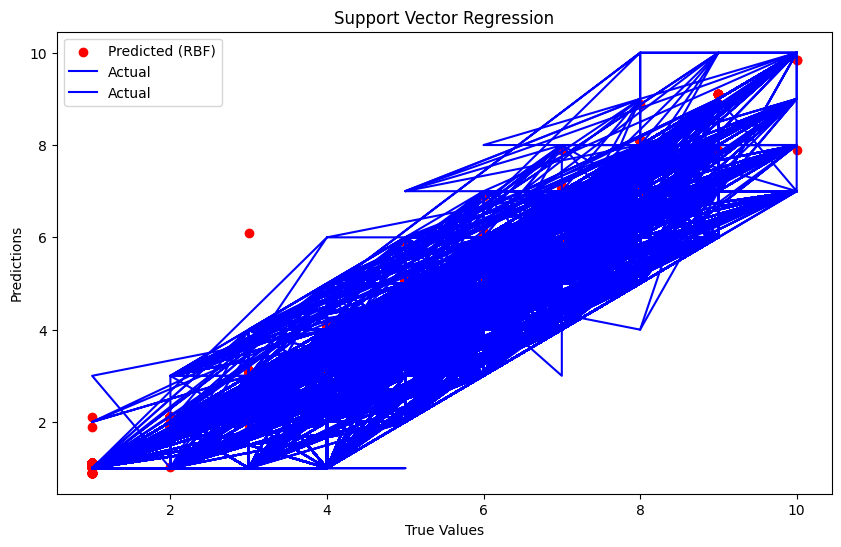

array([5.01422114, 3.97750908, 3.0994764 , ..., 5.89950263, 3.09949871,
       3.90019119])

In [7]:
#taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

support_vector_regression(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       7   6.935724
34078       6   5.959251
26013       4   3.730594
87910       4   3.726387
88159       4   4.400898
...       ...        ...
47260       4   4.373514
9914        2   1.942173
93691       6   6.227799
77229       3   2.927038
7455        4   4.087621

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 24.140853330103393 %
Mean Squared Error: 8.316831241487238 %
Root Mean Squared Error: 28.838916833832783 %

Scatter Plot


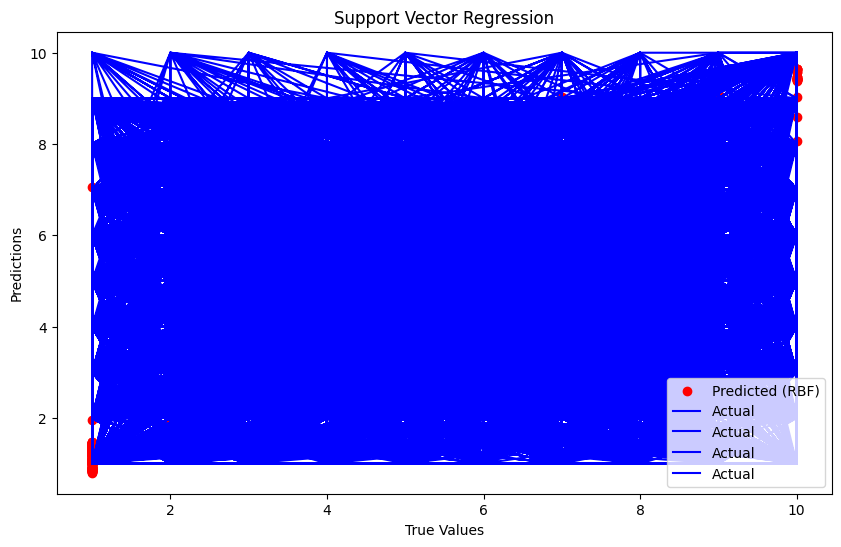

In [8]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = support_vector_regression(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   4.533262
34078       4   4.355426
26013       3   3.018396
87910       4   3.719951
88159       4   3.764027
...       ...        ...
47260       7   6.961397
9914        2   2.278902
93691       6   5.907582
77229       4   4.449592
7455        4   4.415441

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 24.148603041551066 %
Mean Squared Error: 8.20284547065647 %
Root Mean Squared Error: 28.64061010288794 %

Scatter Plot


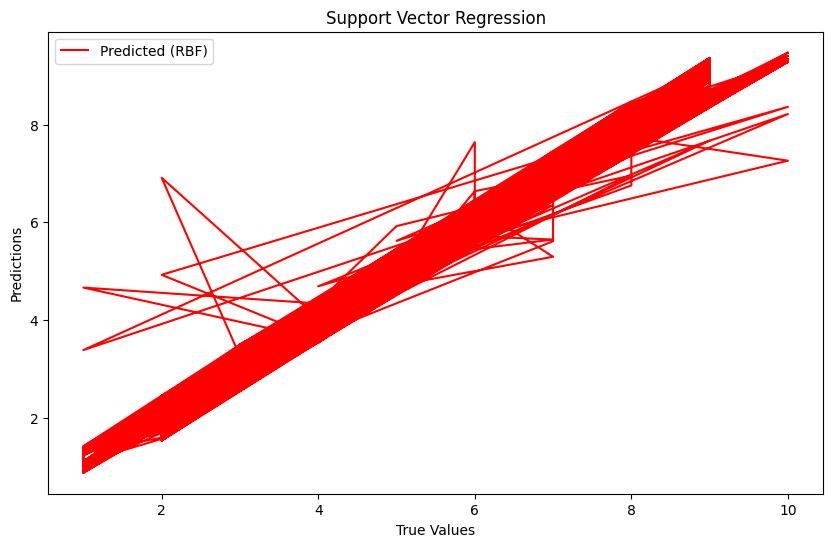

In [13]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = support_vector_regression(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
8399        4   4.899998
19690       3   4.899141
12574       5   4.899152
11330       4   4.899944
10061       2   4.898844
...       ...        ...
17913       4   4.899772
18649       4   4.900036
18310       4   4.899083
19895       4   4.897128
19383       4   4.897368

[4186 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 128.7864105743884 %
Mean Squared Error: 257.18705782280637 %
Root Mean Squared Error: 160.37052653864 %

Scatter Plot


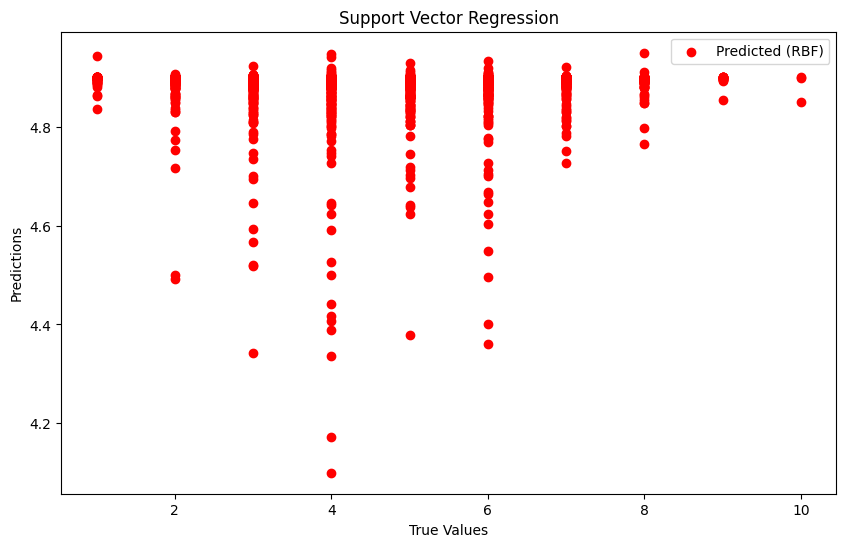

array([4.89999753, 4.89914122, 4.89915208, ..., 4.89908303, 4.89712817,
       4.89736783])

In [15]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

support_vector_regression(X, y)

## **Decision Tree Regression**

A decision tree is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

**Structure of a Decision Tree**
- Root Node: Represents the entire dataset and the initial decision to be made.
- Internal Nodes: Represent decisions or tests on attributes. Each internal node has one or more branches.
- Branches: Represent the outcome of a decision or test, leading to another node.
- Leaf Nodes: Represent the final decision or prediction. No further splits occur at these nodes.

In [53]:
# decision tree
from sklearn.tree import DecisionTreeRegressor


def decision_tree(_X, _y):
    X_train, X_test, y_train, y_test = train_test_split(
        _X, _y, test_size=0.2, random_state=0)
    reg = DecisionTreeRegressor()

    reg = reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    print("\nError Metrics:")
    print('Mean Absolute Error:', metrics.mean_absolute_error(
        y_test, y_pred) * 100, "%")
    print('Mean Squared Error:', metrics.mean_squared_error(
        y_test, y_pred) * 100, "%")
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)) * 100, "%")
    print("\nR2 Score:", metrics.r2_score(y_test, y_pred) * 100, "%")

    print("\nDecision Tree")
    plt.figure(figsize=(10, 6))
    importance = reg.feature_importances_
    plt.bar([columns_to_plot[x] for x in range(len(importance))], importance)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()

    return y_pred

### **All Variables**


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5        5.0
34078       4        4.0
26013       3        3.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       4        4.0
9914        2        2.0
93691       6        6.0
77229       3        3.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.5181162635647272 %
Mean Squared Error: 0.5964416906757287 %
Root Mean Squared Error: 7.722963748948514 %

R2 Score: 99.76452548089529 %

Decision Tree


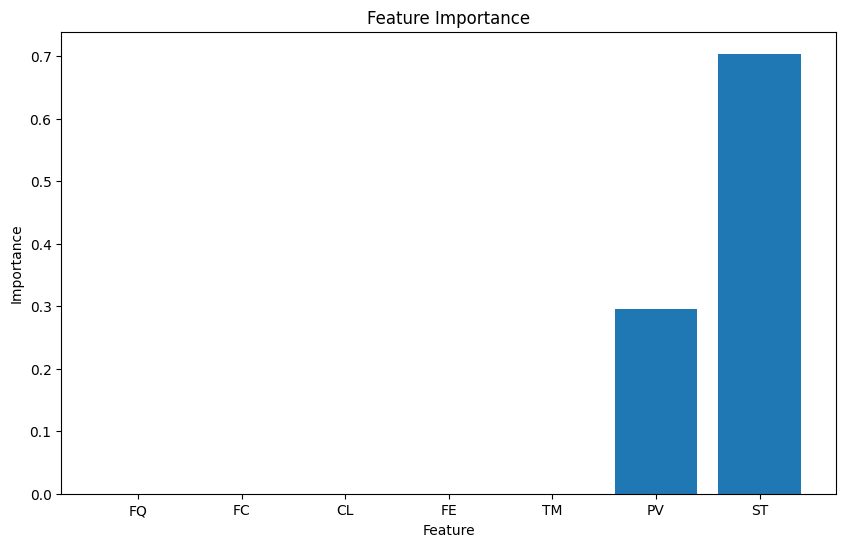

array([5., 4., 3., ..., 6., 3., 4.])

In [54]:
##taking all the columns
X = df[columns_to_plot]
y = df['REC']

decision_tree(X, y)

### JUST **ST** and **PV**


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.005345
34078       4   4.006017
26013       3   3.000365
87910       4   3.998853
88159       4   3.998853
...       ...        ...
47260       4   4.006840
9914        2   1.998995
93691       6   5.999168
77229       3   3.000000
7455        4   3.998853

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.47990175695850823 %
Mean Squared Error: 0.32940920813612246 %
Root Mean Squared Error: 5.739418159849677 %

R2 Score: 99.86994960934632 %

Decision Tree


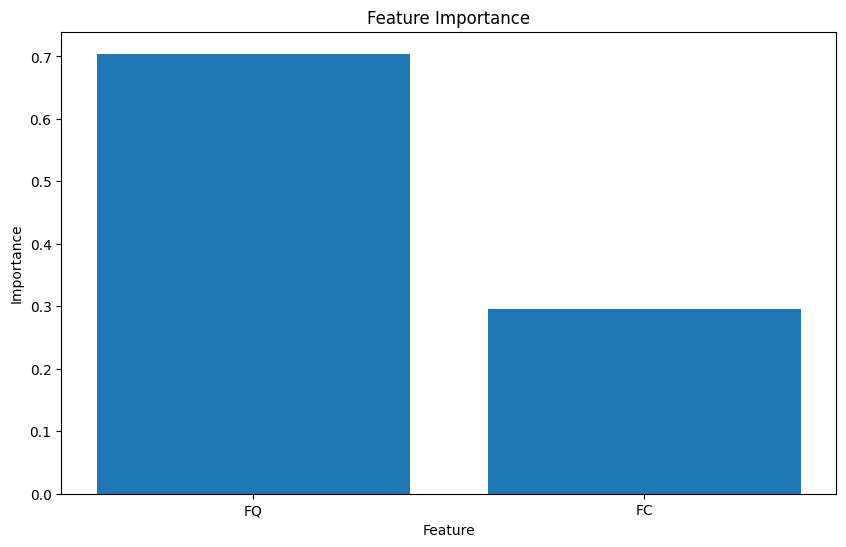

array([5.00534521, 4.0060173 , 3.0003647 , ..., 5.99916823, 3.        ,
       3.99885321])

In [55]:
#taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

decision_tree(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       7        7.0
34078       6        6.0
26013       4        4.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       4        4.0
9914        2        2.0
93691       6        6.0
77229       3        3.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.2957626863698109 %
Mean Squared Error: 0.5418210169162851 %
Root Mean Squared Error: 7.36084925070664 %

R2 Score: 99.80884644351343 %

Decision Tree


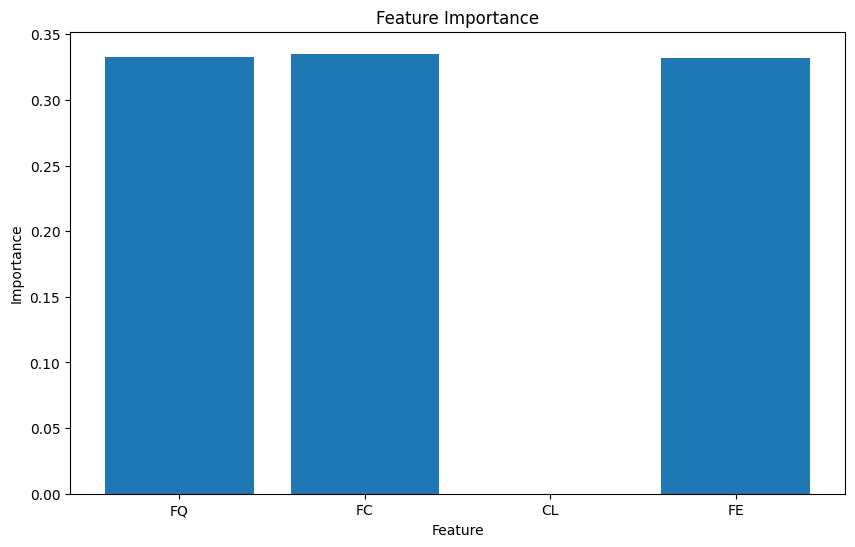

In [56]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = decision_tree(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5        5.0
34078       4        4.0
26013       3        3.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       7        7.0
9914        2        2.0
93691       6        6.0
77229       4        4.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.27381664596745586 %
Mean Squared Error: 0.45474188104739527 %
Root Mean Squared Error: 6.74345520521487 %

R2 Score: 99.8396813814674 %

Decision Tree


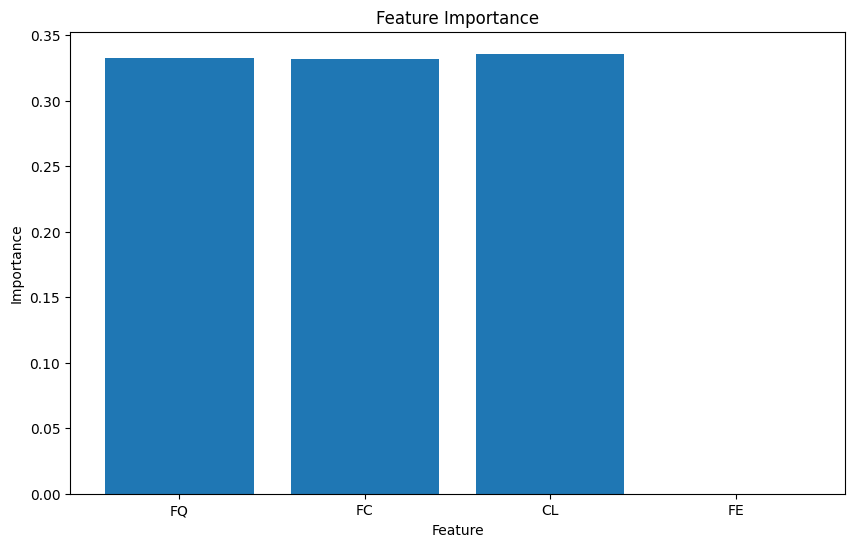

In [57]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = decision_tree(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
8399        4   4.642317
19690       5   4.606625
12574       6   4.599042
11330       4   4.530043
10061       5   4.606625
...       ...        ...
17913       5   4.659601
18649       5   4.681928
18310       7   4.627301
19895       5   4.606625
19383       4   4.639386

[4186 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 131.67937683860828 %
Mean Squared Error: 254.6042409772337 %
Root Mean Squared Error: 159.56322915297048 %

R2 Score: -0.420342415918018 %

Decision Tree


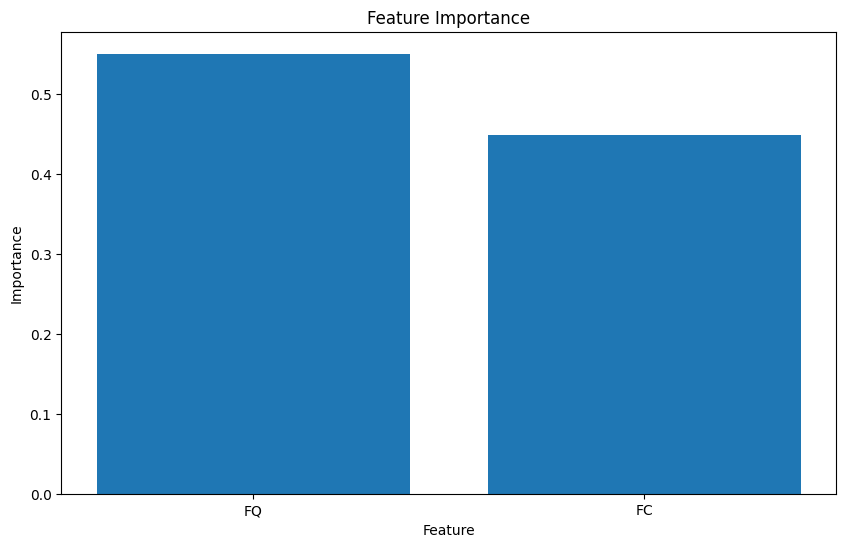

array([4.64231738, 4.60662526, 4.59904153, ..., 4.62730061, 4.60662526,
       4.63938619])

In [58]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

decision_tree(X, y)

## **Random Forest Regression**

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.

In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.



In [16]:
# random forest
from sklearn.ensemble import RandomForestRegressor


def random_forest(_X, _y):
    X_train, X_test, y_train, y_test = train_test_split(
        _X, _y, test_size=0.2, random_state=0)
    
    reg = RandomForestRegressor()

    reg = reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    print("\nError Metrics:")
    print('Mean Absolute Error:', metrics.mean_absolute_error(
        y_test, y_pred) * 100, "%")
    print('Mean Squared Error:', metrics.mean_squared_error(
        y_test, y_pred) * 100, "%")
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)) * 100, "%")
    print("\nR2 Score:", metrics.r2_score(y_test, y_pred) * 100, "%")

    print("\nRandom Forest")
    plt.figure(figsize=(10, 6))
    importance = reg.feature_importances_
    plt.bar([columns_to_plot[x] for x in range(len(importance))], importance)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()

    return y_pred

### **All Variables**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5        5.0
34078       4        4.0
26013       3        3.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       4        4.0
9914        2        2.0
93691       6        6.0
77229       3        3.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.5061335004777052 %
Mean Squared Error: 0.4206599240153896 %
Root Mean Squared Error: 6.4858301243201675 %

R2 Score: 99.83392392774904 %

Random Forest


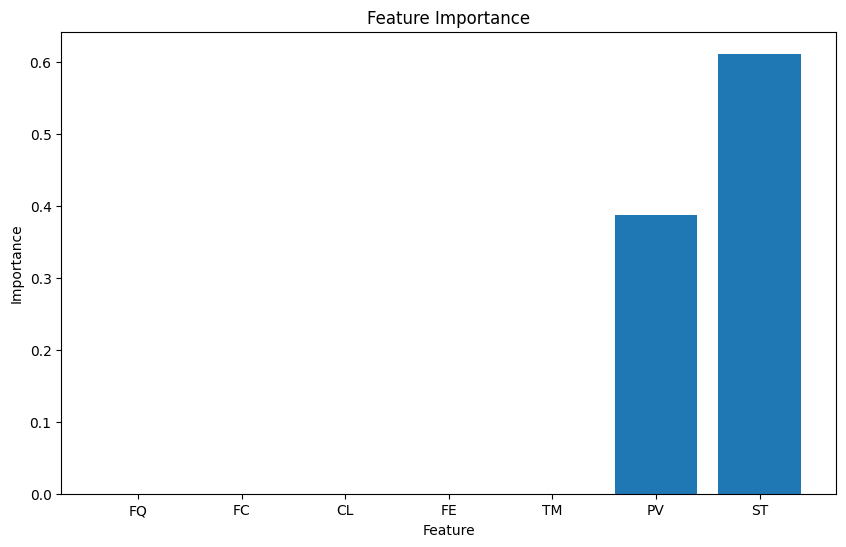

array([5., 4., 3., ..., 6., 3., 4.])

In [17]:
##taking all the columns
X = df[columns_to_plot]
y = df['REC']

random_forest(X, y)

### JUST **ST** and **PV**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.005400
34078       4   4.005919
26013       3   3.000312
87910       4   3.998842
88159       4   3.998842
...       ...        ...
47260       4   4.006881
9914        2   1.999050
93691       6   5.999188
77229       3   3.000000
7455        4   3.998842

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.47820306892057823 %
Mean Squared Error: 0.3294085068709638 %
Root Mean Squared Error: 5.739412050645639 %

R2 Score: 99.86994988620503 %

Random Forest


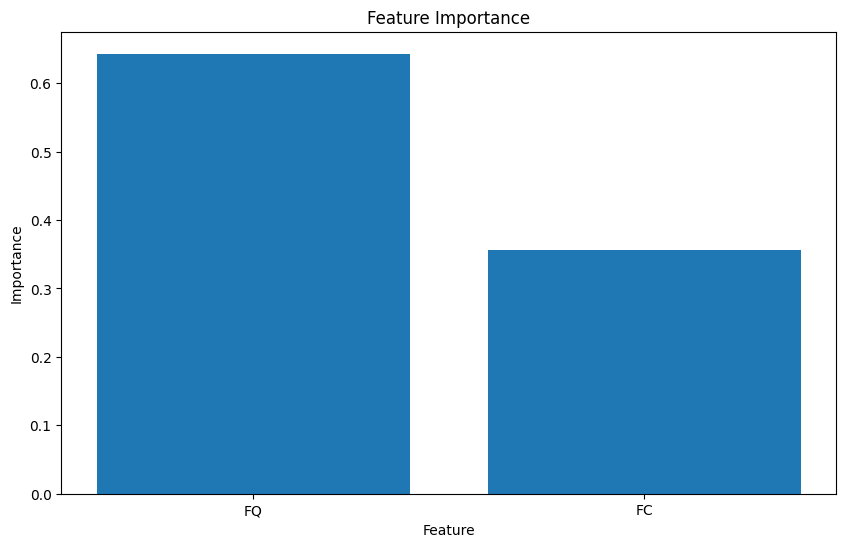

array([5.00539999, 4.00591916, 3.00031192, ..., 5.99918769, 3.        ,
       3.99884237])

In [18]:
##taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

random_forest(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       7        7.0
34078       6        6.0
26013       4        4.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       4        4.0
9914        2        2.0
93691       6        6.0
77229       3        3.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.2989270952591002 %
Mean Squared Error: 0.5451621229150294 %
Root Mean Squared Error: 7.383509483403062 %

R2 Score: 99.80766770685628 %

Random Forest


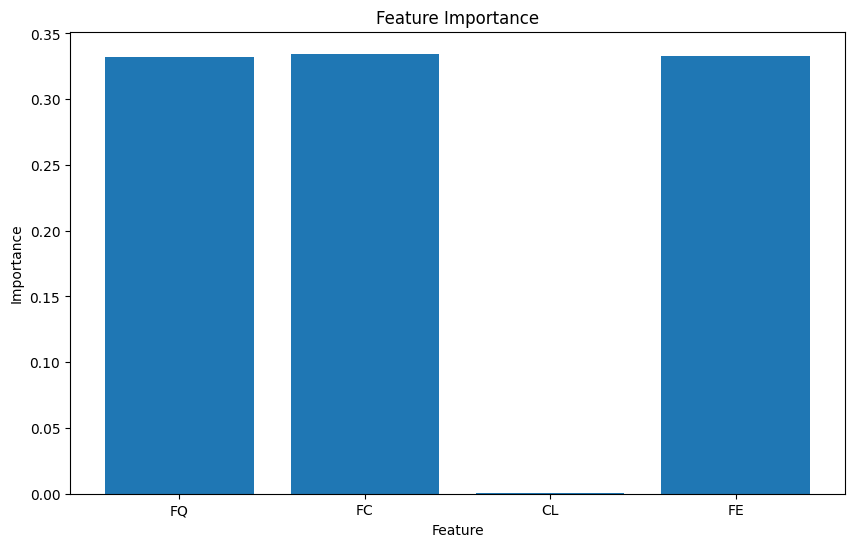

In [19]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = random_forest(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5        5.0
34078       4        4.0
26013       3        3.0
87910       4        4.0
88159       4        4.0
...       ...        ...
47260       7        7.0
9914        2        2.0
93691       6        6.0
77229       4        4.0
7455        4        4.0

[20927 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 0.27367642501472 %
Mean Squared Error: 0.4540793933264543 %
Root Mean Squared Error: 6.738541335678326 %

R2 Score: 99.83991494059323 %

Random Forest


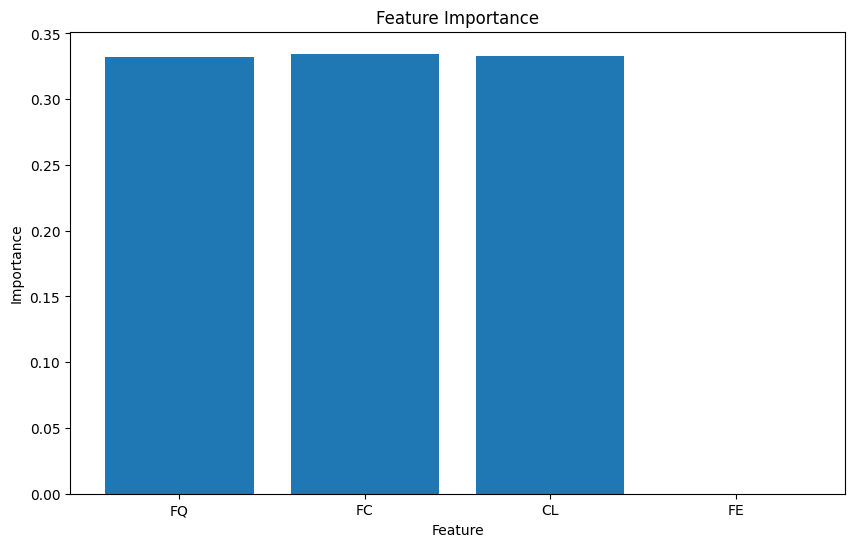

In [20]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = random_forest(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
8399        7   4.709278
19690       3   4.655139
12574       4   4.587930
11330       6   4.517643
10061       5   4.655139
...       ...        ...
17913       4   4.624118
18649       6   4.610635
18310       3   4.602359
19895       7   4.655139
19383       3   4.521246

[4186 rows x 2 columns]

Error Metrics:
Mean Absolute Error: 132.20615869830564 %
Mean Squared Error: 259.1951346986377 %
Root Mean Squared Error: 160.9953833805919 %

R2 Score: -0.5168096478372908 %

Random Forest


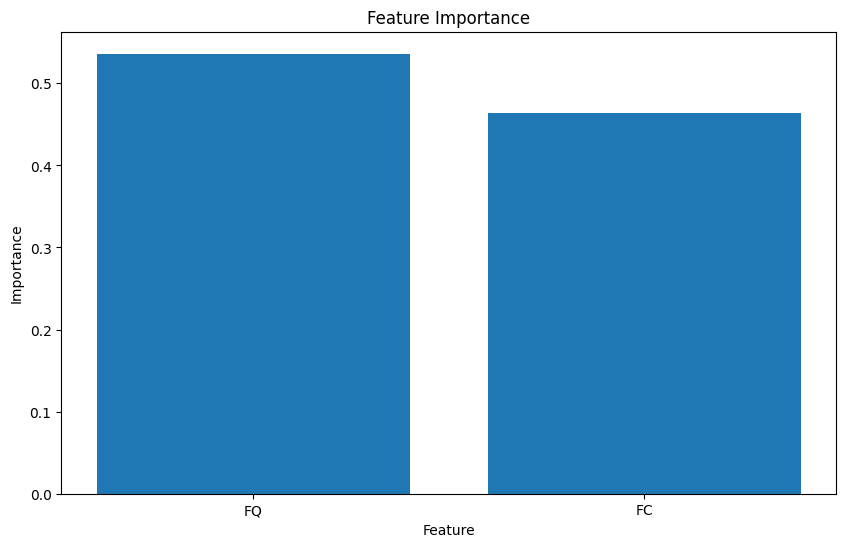

array([4.70927808, 4.65513945, 4.58793001, ..., 4.60235881, 4.65513945,
       4.52124582])

In [21]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

random_forest(X, y)

## **Neural Network Regression**

Neural network regression is a machine learning technique used for solving regression problems. In regression tasks, the goal is to predict a continuous numeric value (e.g., a price, a temperature, a score) based on input data. Neural networks, a type of deep learning model, can be used for regression by learning a mapping from input features to the target output.

- Data Preparation
- Model Architecture
- Loss Function
- Training
- Hyperparameter Tuning
- Evaluation
- Inference

In [ ]:
import tensorflow as tf
import keras


def neural_network_regression(_X, _y):
    X_train, X_test, y_train, y_test = train_test_split(
        _X, _y, test_size=0.2, random_state=0)

    with tf.device('/device:GPU:0'):
        model = keras.Sequential([
            keras.layers.Input(shape=(X_train.shape[1],)),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(1)
        ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, batch_size=3)

    y_pred = model.predict(X_test)

    # comparing actual vs predicted
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    # Evaluating the Algorithm
    print("\nError Metrics:")
    print('Mean Absolute Error:', metrics.mean_absolute_error(
        y_test, y_pred) * 100, "%")
    print('Mean Squared Error:', metrics.mean_squared_error(
        y_test, y_pred) * 100, "%")
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)) * 100, "%")

    # scatter plot
    print("\nScatter Plot")
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')

    plt.show()

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### **All Variables**


Epoch 1/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 20s 696us/step - loss: 0.1242
Epoch 2/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 673us/step - loss: 0.0061
Epoch 3/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 669us/step - loss: 0.0058
Epoch 4/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 670us/step - loss: 0.0056
Epoch 5/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 671us/step - loss: 0.0042
Epoch 6/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 678us/step - loss: 0.0042
Epoch 7/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 664us/step - loss: 0.0041
Epoch 8/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 674us/step - loss: 0.0050
Epoch 9/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 686us/step - loss: 0.0034
Epoch 10/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 686us/step - loss: 0.0035
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.056636
34078       4   4.059802
26013       3   3.063368
87910       4   4.072152
88159       4   4.054125
...       ...        ...
47260 

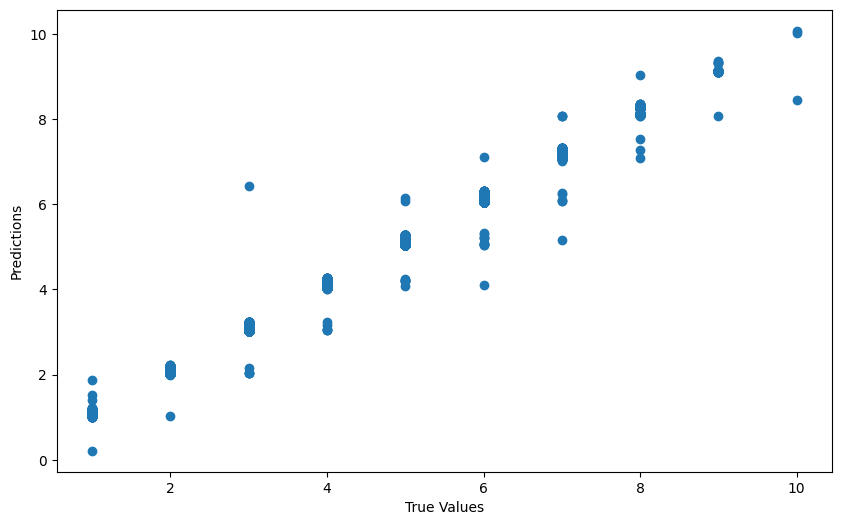

In [ ]:
##taking all the columns
X = df[columns_to_plot]
y = df['REC']

neural_network_regression(X, y)

### JUST **ST** and **PV**


Epoch 1/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 682us/step - loss: 0.3700
Epoch 2/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 676us/step - loss: 0.0044
Epoch 3/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 664us/step - loss: 0.0039
Epoch 4/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 666us/step - loss: 0.0036
Epoch 5/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 668us/step - loss: 0.0036
Epoch 6/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 672us/step - loss: 0.0041
Epoch 7/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 669us/step - loss: 0.0037
Epoch 8/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 18s 655us/step - loss: 0.0040
Epoch 9/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 672us/step - loss: 0.0036
Epoch 10/10
27902/27902 ━━━━━━━━━━━━━━━━━━━━ 19s 675us/step - loss: 0.0029
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step

Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   4.999057
34078       4   3.999488
26013       3   3.001221
87910       4   3.998823
88159       4   3.998823
...       ...        ...
47260 

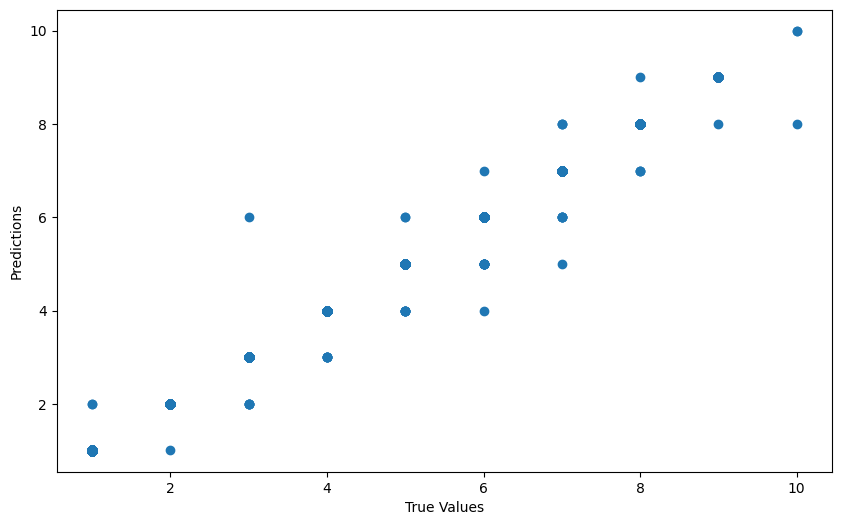

In [34]:
##taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

neural_network_regression(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 


In [ ]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = neural_network_regression(X, y)

In [ ]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = neural_network_regression(X, y)

In [ ]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

neural_network_regression(X, y)

## **Gradiant Boosting Regression**

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met.

The ensemble consists of M trees. Tree1 is trained using the feature matrix X and the labels y. The predictions labeled y1(hat) are used to determine the training set residual errors r1. Tree2 is then trained using the feature matrix X and the residual errors r1 of Tree1 as labels. The predicted results r1(hat) are then used to determine the residual r2. The process is repeated until all the M trees forming the ensemble are trained. There is an important parameter used in this technique known as Shrinkage. Shrinkage refers to the fact that the prediction of each tree in the ensemble is shrunk after it is multiplied by the learning rate (eta) which ranges between 0 to 1. There is a trade-off between eta and the number of estimators, decreasing learning rate needs to be compensated with increasing estimators in order to reach certain model performance. Since all trees are trained now, predictions can be made. Each tree predicts a label and the final prediction is given by the formula,

> y(pred) = y1 + (eta *  r1) + (eta * r2) + ....... + (eta * rN)

In [62]:
# gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting(_X, _y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

    gbr = GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

    gbr.fit(X_train, y_train)

    y_pred = gbr.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nDataframe for Actual vs Predicted")
    print(df)

    mse = metrics.mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse * 100, "%")

    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse * 100, "%")

    mae = metrics.mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae * 100, "%")

    r2 = metrics.r2_score(y_test, y_pred)
    print("R2 Score:", r2 * 100, "%")

    print("Gradient Boosting Regression")
    plt.figure(figsize=(10, 6))
    importance = gbr.feature_importances_
    plt.bar([columns_to_plot[x] for x in range(len(importance))], importance)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Gradient Boosting Regression')
    plt.show()

    return y_pred

### **All Variables**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.045902
34078       4   3.989890
26013       3   3.021547
87910       4   3.962815
88159       4   3.965255
...       ...        ...
47260       4   3.971526
9914        2   1.855139
93691       6   5.906413
77229       3   3.002247
7455        4   3.962815

[20927 rows x 2 columns]
Mean Squared Error: 0.8537732671526524 %
Root Mean Squared Error: 9.239985211853169 %
Mean Absolute Error: 6.077816771586949 %
R2 Score: 99.66293125941706 %
Gradient Boosting Regression


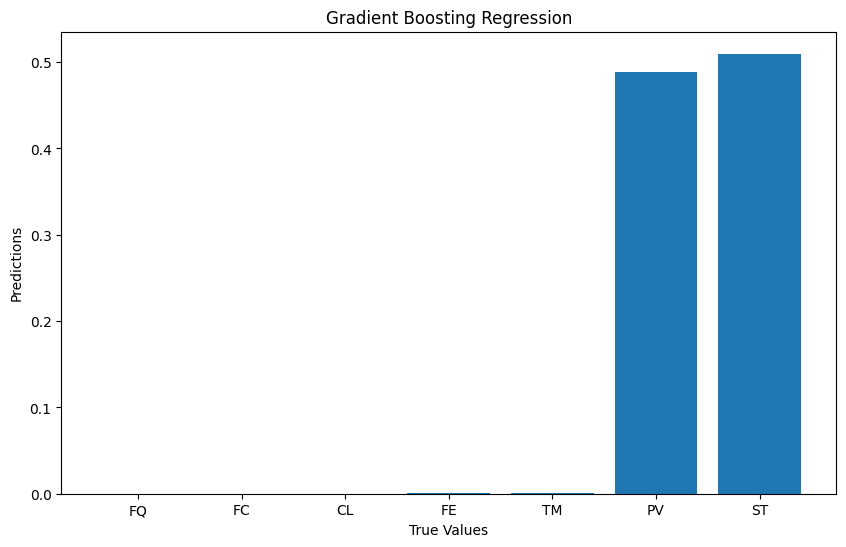

array([5.04590211, 3.98988992, 3.02154663, ..., 5.90641326, 3.00224694,
       3.96281544])

In [63]:
# taking all the columns
X = df[columns_to_plot]
y = df['REC']

gradient_boosting(X, y)

### JUST **ST** and **PV**



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   5.064142
34078       4   3.982970
26013       3   3.032116
87910       4   3.968304
88159       4   3.968304
...       ...        ...
47260       4   3.974997
9914        2   1.865245
93691       6   5.910922
77229       3   3.013347
7455        4   3.968304

[20927 rows x 2 columns]
Mean Squared Error: 0.9155788630121284 %
Root Mean Squared Error: 9.568588521888318 %
Mean Absolute Error: 6.342057945667825 %
R2 Score: 99.63853047860225 %
Gradient Boosting Regression


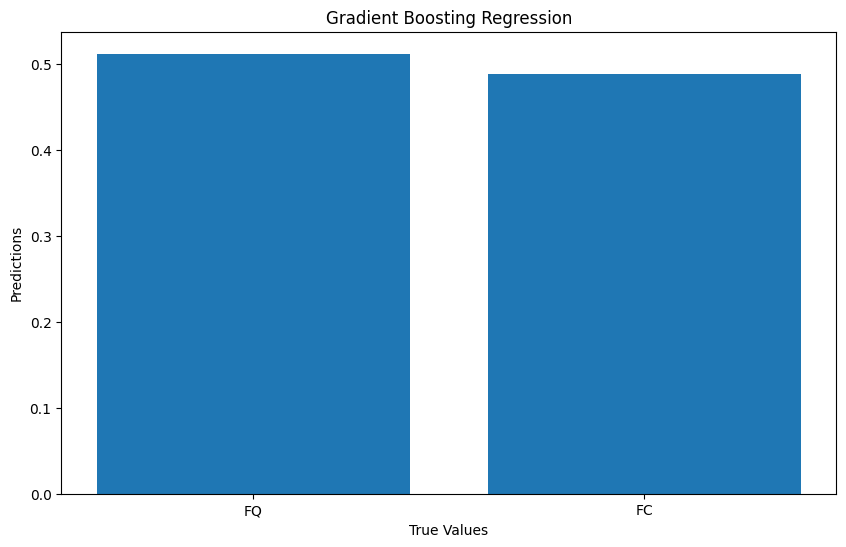

array([5.06414197, 3.98297031, 3.0321165 , ..., 5.91092226, 3.01334676,
       3.96830439])

In [64]:
#taking only ST and PV
X = df[['ST', 'PV']]
y = df['REC']

gradient_boosting(X, y)

### Predicting **PV** from **FC**, **FQ**, **FE** and **ST** from **FQ**, **FC**, **TM**. Finally, predictic **REC** from them. 



Dataframe for Actual vs Predicted
       Actual  Predicted
78536       7   6.972810
34078       6   5.999477
26013       4   3.681805
87910       4   3.696807
88159       4   4.364955
...       ...        ...
47260       4   4.277741
9914        2   2.033274
93691       6   6.321722
77229       3   2.990063
7455        4   4.016741

[20927 rows x 2 columns]
Mean Squared Error: 7.903009145685205 %
Root Mean Squared Error: 28.112291165405225 %
Mean Absolute Error: 23.19131794084296 %
R2 Score: 97.2118314757491 %
Gradient Boosting Regression


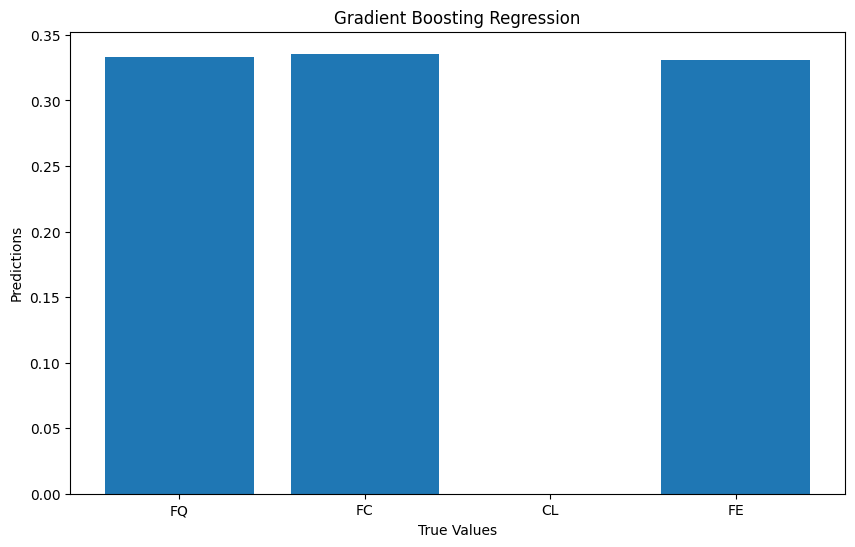

In [65]:
## predicting PV from FC, FQ and FE
X = df[['FC', 'FQ', 'CL', 'FE']]
y = df['PV']

pv_df = gradient_boosting(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
78536       5   4.733108
34078       4   4.335862
26013       3   3.050200
87910       4   3.749870
88159       4   3.623920
...       ...        ...
47260       7   6.897654
9914        2   2.390060
93691       6   6.096275
77229       4   4.352860
7455        4   4.420913

[20927 rows x 2 columns]
Mean Squared Error: 7.778750000196233 %
Root Mean Squared Error: 27.890410538742938 %
Mean Absolute Error: 23.13600217415239 %
R2 Score: 97.25761249201518 %
Gradient Boosting Regression


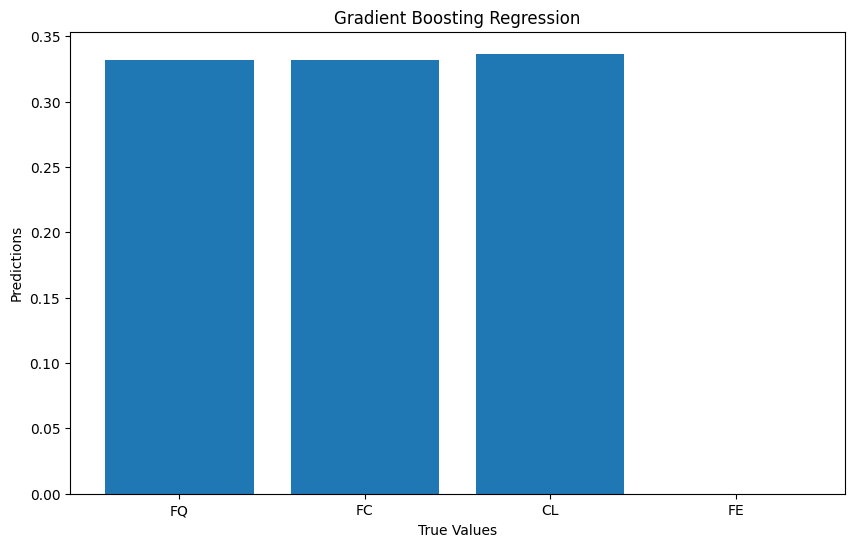

In [66]:
## predicting ST from CL, TM and FQ
X = df[['FC', 'FQ', 'TM', 'FE']]
y = df['ST']

st_df = gradient_boosting(X, y)


Dataframe for Actual vs Predicted
       Actual  Predicted
8399        4   4.584924
19690       5   4.583420
12574       6   4.525162
11330       6   4.626253
10061       5   4.582949
...       ...        ...
17913       4   4.560164
18649       4   4.691342
18310       6   4.785524
19895       7   4.500900
19383       6   4.550070

[4186 rows x 2 columns]
Mean Squared Error: 251.33675651443875 %
Root Mean Squared Error: 158.53603896730823 %
Mean Absolute Error: 130.49183673101493 %
R2 Score: -0.357133450753766 %
Gradient Boosting Regression


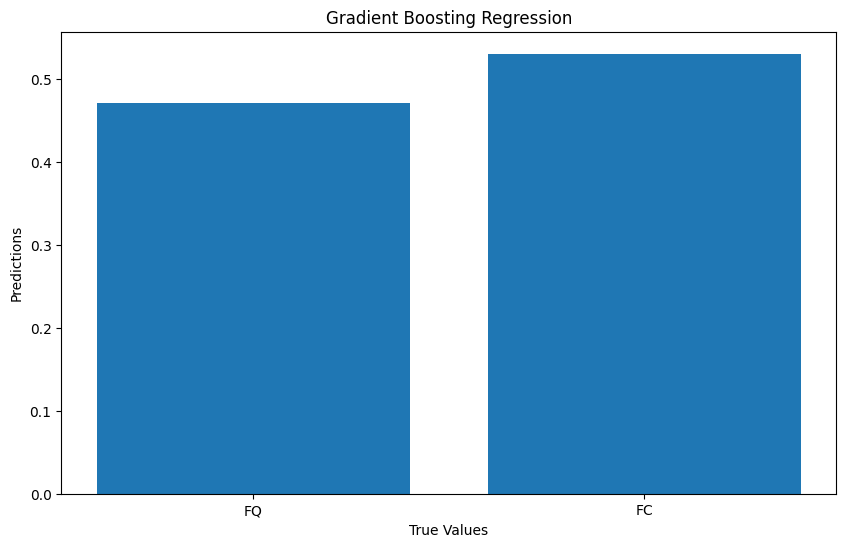

array([4.58492373, 4.58342001, 4.52516185, ..., 4.78552386, 4.50089998,
       4.55006984])

In [67]:
## predicting REC from pv_df and st_df
X = pd.DataFrame({'PV': pv_df, 'ST': st_df})
# 20927 rows from the original dataset of REC column
y = df['REC']
## shuffle y
y = y.sample(frac=1).reset_index(drop=True)
y = y.loc[:20926]

gradient_boosting(X, y)